# week6 exercise
### here we look at the number of days with high temperature exceeding 90 degree F. 
### we hypothesize that the occurrence of hot weather is linked to the rise of annual mean temperature

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('dark_background')

### loading the temperature and the number of hot days for Santa Maria CA

In [2]:
# load the data
data=np.genfromtxt('DATA/SantaMariaCA_Ndays90.tsv',delimiter='\t')
data2=np.genfromtxt('DATA/SantaMariaCA_temp.tsv',delimiter='\t')
yr=data[:,0]
Ndays90=np.sum(data[:,1:13],1)
Tmean=np.mean(data2[:,1:13],1)

### plot the yearly mean temperature and the number of hot days as a function of time

Text(0, 0.5, 'yearly mean temperature, deg F')

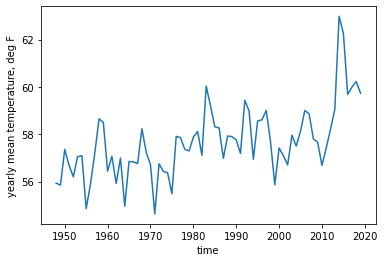

In [3]:
plt.plot(yr,Tmean)
plt.xlabel('time')
plt.ylabel('yearly mean temperature, deg F')

the regression coeff for N day with daily Tmax > 90F is 0.045


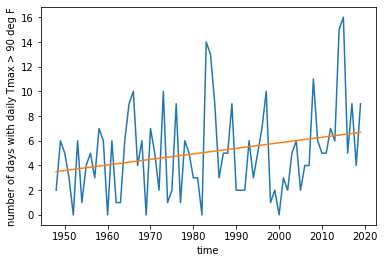

In [4]:
plt.plot(yr,Ndays90)
plt.xlabel('time')
plt.ylabel('number of days with daily Tmax > 90 deg F')
c=np.cov(yr,Ndays90)
a=c[0,1]/c[0,0]
b=np.mean(Ndays90)-a*np.mean(yr)
yest=a*yr+b;
plt.plot(yr,yest);
print('the regression coeff for N day with daily Tmax > 90F is '+str(round(a,3)))

### Calculate the standard error of regression, then 95% confidence interval

In [5]:
# calculate 95% CI on the regression coeff
CL=95;
N=len(yr)
err=np.sum((yest-Ndays90)**2)/(N-2);
se2=err/np.sum((yr-np.mean(yr))**2);
se=np.sqrt(se2)
print('SE of the regression coeff is '+str(round(se,3)))

SE of the regression coeff is 0.02


In [6]:
# Use Gaussian since N is larger than 30
alo = a-2*se
aup = a+2*se
print('the 95% CI on the regression is between '+str(round(alo,3))+' and '+str(round(aup,3)))

the 95% CI on the regression is between 0.005 and 0.085


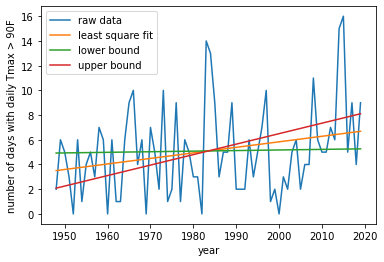

In [7]:
blo=np.mean(Ndays90)-alo*np.mean(yr)
ylo=alo*yr+blo;
bup=np.mean(Ndays90)-aup*np.mean(yr)
yup=aup*yr+bup;
plt.plot(yr,Ndays90)
plt.plot(yr,yest)
plt.plot(yr,ylo)
plt.plot(yr,yup)
plt.legend(('raw data','least square fit','lower bound','upper bound'));
plt.xlabel('year')
plt.ylabel('number of days with daily Tmax > 90F');

### Is the # of days with daily Tmax > 90F correlated with the yearly mean temperature?

R value between mean temp and heat wave is 0.544


Text(0, 0.5, 'number of days with daily Tmax > 90F')

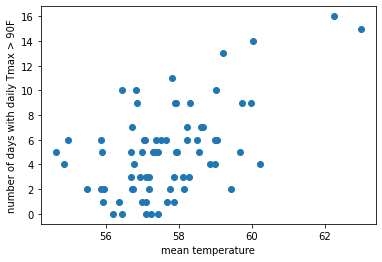

In [10]:
# is the heat wave related to yearly mean temperature? 
plt.plot(Tmean,Ndays90,'o');
R=np.corrcoef(Tmean,Ndays90)
print('R value between mean temp and heat wave is '+str(round(R[0,1],3)))
plt.xlabel('mean temperature')
plt.ylabel('number of days with daily Tmax > 90F')

In [11]:
# use t-test
tval = R[0,1]*np.sqrt((N-2)/(1-R[0,1]**2))
print('t-value of the correlation between mean T and heat wave is '+str(round(tval,3)))

t-value of the correlation between mean T and heat wave is 5.431
